# 1.2.4 散度

对于散度，我们除了要能求具体函数的散度，还要能画出其图像。
其次我们要对抽象函数形式上求散度，以及适当的化简。

## 求具体矢量场的散度

In [1]:
import sympy as sp
from sympy.vector import CoordSys3D, divergence
from IPython.display import display

# 创建一个三维坐标系
N = CoordSys3D('N')

# 定义矢量场 A
# 假设 A = x^2 * i + y^2 * j + z * k
A = N.x**2 * N.i + N.y**2 * N.j + N.z * N.k # 我们曾学过如何定义矢量场

# 计算矢量场的散度
div_A = divergence(A)

# 输出散度
print("矢量场的散度 (∇·A):")
display(div_A)

矢量场的散度 (∇·A):


2*N.x + 2*N.y + 1

我们已经能求某个矢量场的散度了，接下来，我们尝试画出矢量场的图像，观察散度的值和矢量场的关系。

## 画出矢量场的图像

我觉得最好的是，画出三维空间的二维剖面。
用颜色表示数值大小，箭头尽可能短。

In [2]:
import sympy as sp
import numpy as np
from sympy.vector import CoordSys3D, divergence
from IPython.display import display

# 创建一个三维坐标系
N = CoordSys3D('N')

# 定义矢量场 A
# 假设 A = x^2 * i + y^2 * j + z * k
A = N.x * N.i + N.y * N.j + N.z * N.k
print('矢量场：')
display(A)

# 计算矢量场的散度
div_A = divergence(A)

# 输出散度
print("矢量场的散度 (∇·A):")
display(div_A)

矢量场：


N.x*N.i + N.y*N.j + N.z*N.k

矢量场的散度 (∇·A):


3

矢量场：


N.x*N.i + N.y*N.j + N.z*N.k

矢量场的散度 (∇·A):


3

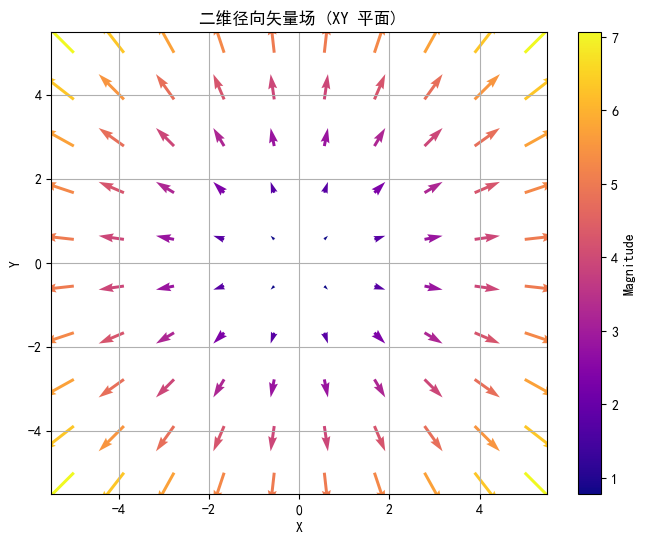

In [3]:
import numpy as np
import sympy as sp
from sympy.vector import CoordSys3D, divergence
from IPython.display import display

import matplotlib.pyplot as plt
from matplotlib import rcParams
# 设置字体，防止中文乱码
rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
rcParams['axes.unicode_minus'] = False    # 解决负号无法正常显示的问题

# 定义矢量场函数
def vector_field(x_vals, y_vals, z_vals):
    
    # 创建一个三维坐标系
    N = CoordSys3D('N')
    # 定义矢量场
    A = N.x * N.i + N.y * N.j + N.z * N.k
    print('矢量场：')
    display(A)

    # 计算矢量场的散度
    div_A = divergence(A)
    # 输出散度
    print("矢量场的散度 (∇·A):")
    display(div_A)
    
    # 提取矢量场 A 在 x, y, z 方向的分量
    Ax = A & N.i
    Ay = A & N.j
    Az = A & N.k
    # 计算 x, y, z 方向的分量
    A_x = np.zeros_like(x_vals, dtype=float)
    A_y = np.zeros_like(y_vals, dtype=float)
    A_z = np.zeros_like(z_vals, dtype=float)
    
    for i in range(x_vals.shape[0]):
        for j in range(x_vals.shape[1]):
            for k in range(x_vals.shape[2]):
                A_x[i, j, k] = float(Ax.subs({N.x: x_vals[i, j, k], N.y: y_vals[i, j, k], N.z: z_vals[i, j, k]}))
                A_y[i, j, k] = float(Ay.subs({N.x: x_vals[i, j, k], N.y: y_vals[i, j, k], N.z: z_vals[i, j, k]}))
                A_z[i, j, k] = float(Az.subs({N.x: x_vals[i, j, k], N.y: y_vals[i, j, k], N.z: z_vals[i, j, k]}))
    return A_x, A_y, A_z

# 创建网格点
x = np.linspace(-5, 5, 10)
y = np.linspace(-5, 5, 10)
z = np.linspace(-5, 5, 10)
X, Y, Z = np.meshgrid(x, y, z)

# 计算每个网格点的矢量场分量
A_x, A_y, A_z = vector_field(X, Y, Z)

# 绘制矢量场
plt.figure(figsize=(8, 6))
plt.quiver(X[:, :, 0], Y[:, :, 0], A_x[:, :, 0], A_y[:, :, 0], np.sqrt(A_x[:, :, 0]**2 + A_y[:, :, 0]**2), cmap='plasma')
plt.colorbar(label='Magnitude')
plt.title('二维径向矢量场 (XY 平面)')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

#### 这个二维图像已经很好了，如果要画出三维图像呢？

矢量场：


N.x*N.i + N.y*N.j + N.z*N.k

矢量场的散度 (∇·A):


3

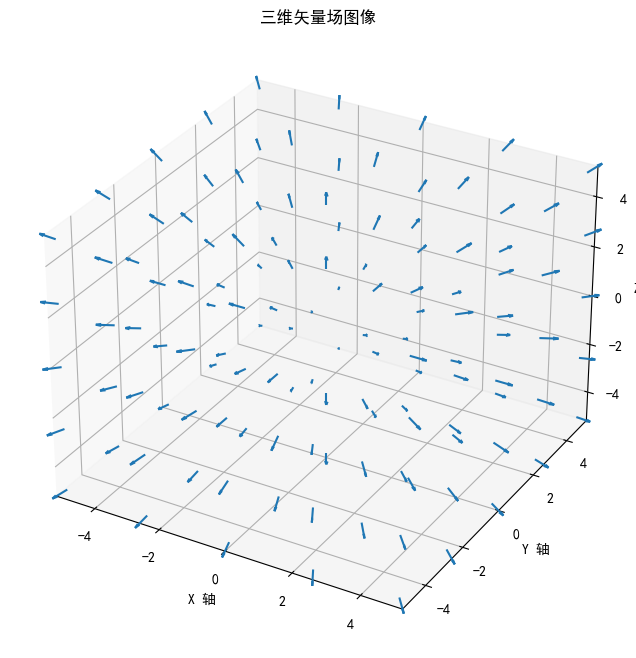

In [12]:
import numpy as np
import sympy as sp
from sympy.vector import CoordSys3D, divergence
from IPython.display import display

import matplotlib.pyplot as plt
from matplotlib import rcParams
# 设置字体，防止中文乱码
rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
rcParams['axes.unicode_minus'] = False    # 解决负号无法正常显示的问题

# 定义矢量场函数
def vector_field(x_vals, y_vals, z_vals):
    
    # 创建一个三维坐标系
    N = CoordSys3D('N')
    # 定义矢量场
    A = N.x * N.i + N.y * N.j + N.z * N.k
    print('矢量场：')
    display(A)

    # 计算矢量场的散度
    div_A = divergence(A)
    # 输出散度
    print("矢量场的散度 (∇·A):")
    display(div_A)
    
    # 提取矢量场 A 在 x, y, z 方向的分量
    Ax = A & N.i
    Ay = A & N.j
    Az = A & N.k
    # 计算 x, y, z 方向的分量
    A_x = np.zeros_like(x_vals, dtype=float)
    A_y = np.zeros_like(y_vals, dtype=float)
    A_z = np.zeros_like(z_vals, dtype=float)
    
    for i in range(x_vals.shape[0]):
        for j in range(x_vals.shape[1]):
            for k in range(x_vals.shape[2]):
                A_x[i, j, k] = float(Ax.subs({N.x: x_vals[i, j, k], N.y: y_vals[i, j, k], N.z: z_vals[i, j, k]}))
                A_y[i, j, k] = float(Ay.subs({N.x: x_vals[i, j, k], N.y: y_vals[i, j, k], N.z: z_vals[i, j, k]}))
                A_z[i, j, k] = float(Az.subs({N.x: x_vals[i, j, k], N.y: y_vals[i, j, k], N.z: z_vals[i, j, k]}))
    return A_x, A_y, A_z

# 创建网格点
x = np.linspace(-5, 5, 5)
y = np.linspace(-5, 5, 5)
z = np.linspace(-5, 5, 5)
X, Y, Z = np.meshgrid(x, y, z)

# 计算每个网格点的矢量场分量
A_x, A_y, A_z = vector_field(X, Y, Z)

# 绘制 3D 矢量场
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, A_x, A_y, A_z, length=0.5, normalize=True, cmap='plasma')
#ax.colorbar(label='Magnitude')
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
ax.set_zlim([-5, 5])
ax.set_xlabel('X 轴')
ax.set_ylabel('Y 轴')
ax.set_zlabel('Z 轴')
ax.set_title('三维矢量场图像')
plt.show()

这个图像的缺点是不够直观，因为矢量太多，太杂。
我们可以这样解决问题：加入颜色，表示矢量场的大小；只考虑矢量场的具体面上的分布，而不是整个空间的分布。

矢量场：


N.x*N.i + N.y*N.j + N.z*N.k

矢量场的散度 (∇·A):


3

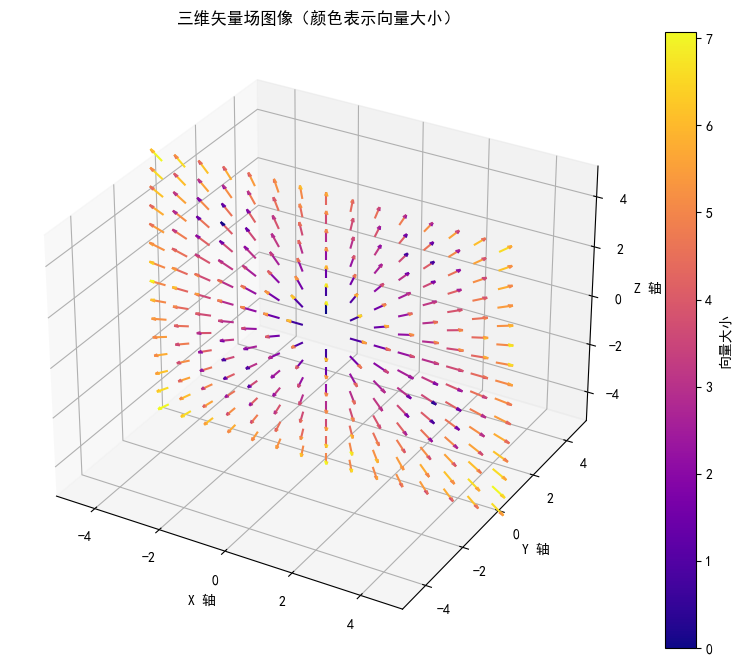

In [18]:
import numpy as np
import sympy as sp
from sympy.vector import CoordSys3D, divergence
from IPython.display import display

import matplotlib.pyplot as plt
from matplotlib import rcParams, cm  # 引入 cm 用于颜色映射
from mpl_toolkits.mplot3d import Axes3D  # 用于 3D 绘图

# 设置字体，防止中文乱码
rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
rcParams['axes.unicode_minus'] = False    # 解决负号无法正常显示的问题

# 定义矢量场函数
def vector_field(x_vals, y_vals, z_vals):
    # 创建一个三维坐标系
    N = CoordSys3D('N')
    # 定义矢量场
    A = N.x * N.i + N.y * N.j + N.z * N.k
    print('矢量场：')
    display(A)

    # 计算矢量场的散度
    div_A = divergence(A)
    print("矢量场的散度 (∇·A):")
    display(div_A)
    
    # 提取矢量场 A 在 x, y, z 方向的分量
    Ax = A & N.i
    Ay = A & N.j
    Az = A & N.k
    # 初始化 x, y, z 分量数组
    A_x = np.zeros_like(x_vals, dtype=float)
    A_y = np.zeros_like(y_vals, dtype=float)
    A_z = np.zeros_like(z_vals, dtype=float)
    magnitudes = np.zeros_like(x_vals, dtype=float)  # 用于存储向量大小
    
    for i in range(x_vals.shape[0]):
        for j in range(x_vals.shape[1]):
            for k in range(x_vals.shape[2]):
                # 在每个点上计算矢量场的分量
                A_x[i, j, k] = float(Ax.subs({N.x: x_vals[i, j, k], N.y: y_vals[i, j, k], N.z: z_vals[i, j, k]}))
                A_y[i, j, k] = float(Ay.subs({N.x: x_vals[i, j, k], N.y: y_vals[i, j, k], N.z: z_vals[i, j, k]}))
                A_z[i, j, k] = float(Az.subs({N.x: x_vals[i, j, k], N.y: y_vals[i, j, k], N.z: z_vals[i, j, k]}))
                # 计算每个向量的大小
                magnitudes[i, j, k] = np.sqrt(A_x[i, j, k]**2 + A_y[i, j, k]**2 + A_z[i, j, k]**2)
    return A_x, A_y, A_z, magnitudes

# 创建网格点
x = np.linspace(-5, 5, 15)
y = np.linspace(0, 0, 1)
z = np.linspace(-5, 5, 15)
X, Y, Z = np.meshgrid(x, y, z)

# 计算每个网格点的矢量场分量和大小
A_x, A_y, A_z, magnitudes = vector_field(X, Y, Z)

# 绘制 3D 矢量场
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 将向量大小映射到颜色
norm = plt.Normalize(magnitudes.min(), magnitudes.max())
colors = cm.plasma(norm(magnitudes))

# 绘制矢量场，使用颜色表示大小
quiver = ax.quiver(X, Y, Z, A_x, A_y, A_z, length=0.5, normalize=True, color=colors.reshape(-1, 4), cmap='plasma')

# 添加颜色条
sm = plt.cm.ScalarMappable(cmap='plasma', norm=norm)
sm.set_array([])
fig.colorbar(sm, ax=ax, label='向量大小')

ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
ax.set_zlim([-5, 5])
ax.set_xlabel('X 轴')
ax.set_ylabel('Y 轴')
ax.set_zlabel('Z 轴')
ax.set_title('三维矢量场图像（颜色表示向量大小）')
plt.savefig('3D_vector_field.png')
plt.show()

矢量场：


N.x*N.i + N.y*N.j + N.z*N.k

矢量场的散度 (∇·A):


3

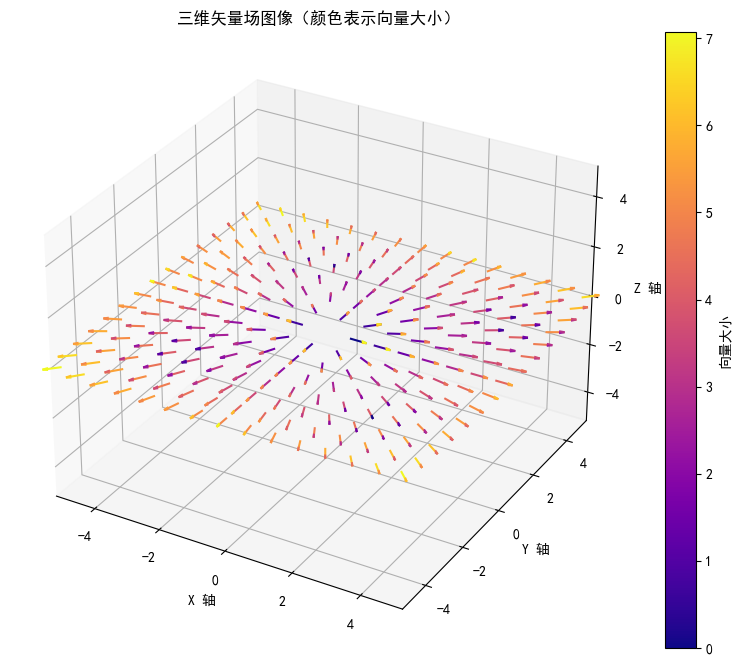

In [19]:
import numpy as np
import sympy as sp
from sympy.vector import CoordSys3D, divergence
from IPython.display import display

import matplotlib.pyplot as plt
from matplotlib import rcParams, cm  # 引入 cm 用于颜色映射
from mpl_toolkits.mplot3d import Axes3D  # 用于 3D 绘图

# 设置字体，防止中文乱码
rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
rcParams['axes.unicode_minus'] = False    # 解决负号无法正常显示的问题

# 定义矢量场函数
def vector_field(x_vals, y_vals, z_vals):
    # 创建一个三维坐标系
    N = CoordSys3D('N')
    # 定义矢量场
    A = N.x * N.i + N.y * N.j + N.z * N.k
    print('矢量场：')
    display(A)

    # 计算矢量场的散度
    div_A = divergence(A)
    print("矢量场的散度 (∇·A):")
    display(div_A)
    
    # 提取矢量场 A 在 x, y, z 方向的分量
    Ax = A & N.i
    Ay = A & N.j
    Az = A & N.k
    # 初始化 x, y, z 分量数组
    A_x = np.zeros_like(x_vals, dtype=float)
    A_y = np.zeros_like(y_vals, dtype=float)
    A_z = np.zeros_like(z_vals, dtype=float)
    magnitudes = np.zeros_like(x_vals, dtype=float)  # 用于存储向量大小
    
    for i in range(x_vals.shape[0]):
        for j in range(x_vals.shape[1]):
            for k in range(x_vals.shape[2]):
                # 在每个点上计算矢量场的分量
                A_x[i, j, k] = float(Ax.subs({N.x: x_vals[i, j, k], N.y: y_vals[i, j, k], N.z: z_vals[i, j, k]}))
                A_y[i, j, k] = float(Ay.subs({N.x: x_vals[i, j, k], N.y: y_vals[i, j, k], N.z: z_vals[i, j, k]}))
                A_z[i, j, k] = float(Az.subs({N.x: x_vals[i, j, k], N.y: y_vals[i, j, k], N.z: z_vals[i, j, k]}))
                # 计算每个向量的大小
                magnitudes[i, j, k] = np.sqrt(A_x[i, j, k]**2 + A_y[i, j, k]**2 + A_z[i, j, k]**2)
    return A_x, A_y, A_z, magnitudes

# 创建网格点
x = np.linspace(-5, 5, 15)
y = np.linspace(-5, 5, 15)
z = np.linspace(0, 0, 1)
X, Y, Z = np.meshgrid(x, y, z)

# 计算每个网格点的矢量场分量和大小
A_x, A_y, A_z, magnitudes = vector_field(X, Y, Z)

# 绘制 3D 矢量场
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 将向量大小映射到颜色
norm = plt.Normalize(magnitudes.min(), magnitudes.max())
colors = cm.plasma(norm(magnitudes))

# 绘制矢量场，使用颜色表示大小
quiver = ax.quiver(X, Y, Z, A_x, A_y, A_z, length=0.5, normalize=True, color=colors.reshape(-1, 4), cmap='plasma')

# 添加颜色条
sm = plt.cm.ScalarMappable(cmap='plasma', norm=norm)
sm.set_array([])
fig.colorbar(sm, ax=ax, label='向量大小')

ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
ax.set_zlim([-5, 5])
ax.set_xlabel('X 轴')
ax.set_ylabel('Y 轴')
ax.set_zlabel('Z 轴')
ax.set_title('三维矢量场图像（颜色表示向量大小）')
plt.savefig('3D_vector_field.png')
plt.show()

## 矢量场散度的例子：常数矢量场

#### 绘出其2D图像

矢量场：


N.j

矢量场的散度 (∇·A):


0

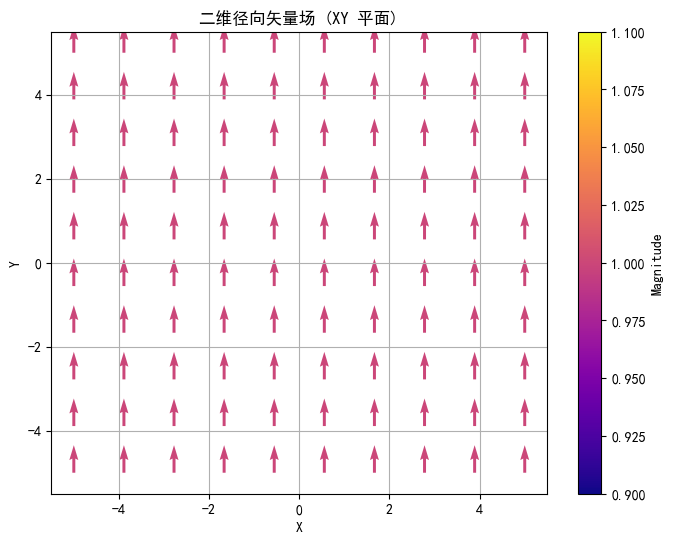

In [20]:
import numpy as np
import sympy as sp
from sympy.vector import CoordSys3D, divergence
from IPython.display import display

import matplotlib.pyplot as plt
from matplotlib import rcParams
# 设置字体，防止中文乱码
rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
rcParams['axes.unicode_minus'] = False    # 解决负号无法正常显示的问题

# 定义矢量场函数
def vector_field(x_vals, y_vals, z_vals):
    
    # 创建一个三维坐标系
    N = CoordSys3D('N')
    # 定义矢量场
    A = N.j
    print('矢量场：')
    display(A)

    # 计算矢量场的散度
    div_A = divergence(A)
    # 输出散度
    print("矢量场的散度 (∇·A):")
    display(div_A)
    
    # 提取矢量场 A 在 x, y, z 方向的分量
    Ax = A & N.i
    Ay = A & N.j
    Az = A & N.k
    # 计算 x, y, z 方向的分量
    A_x = np.zeros_like(x_vals, dtype=float)
    A_y = np.zeros_like(y_vals, dtype=float)
    A_z = np.zeros_like(z_vals, dtype=float)
    
    for i in range(x_vals.shape[0]):
        for j in range(x_vals.shape[1]):
            for k in range(x_vals.shape[2]):
                A_x[i, j, k] = float(Ax.subs({N.x: x_vals[i, j, k], N.y: y_vals[i, j, k], N.z: z_vals[i, j, k]}))
                A_y[i, j, k] = float(Ay.subs({N.x: x_vals[i, j, k], N.y: y_vals[i, j, k], N.z: z_vals[i, j, k]}))
                A_z[i, j, k] = float(Az.subs({N.x: x_vals[i, j, k], N.y: y_vals[i, j, k], N.z: z_vals[i, j, k]}))
    return A_x, A_y, A_z

# 创建网格点
x = np.linspace(-5, 5, 10)
y = np.linspace(-5, 5, 10)
z = np.linspace(-5, 5, 10)
X, Y, Z = np.meshgrid(x, y, z)

# 计算每个网格点的矢量场分量
A_x, A_y, A_z = vector_field(X, Y, Z)

# 绘制矢量场
plt.figure(figsize=(8, 6))
plt.quiver(X[:, :, 0], Y[:, :, 0], A_x[:, :, 0], A_y[:, :, 0], np.sqrt(A_x[:, :, 0]**2 + A_y[:, :, 0]**2), cmap='plasma')
plt.colorbar(label='Magnitude')
plt.title('二维径向矢量场 (XY 平面)')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

#### 二维图像很完美了，再绘出其三维图像。


矢量场：


N.j

矢量场的散度 (∇·A):


0

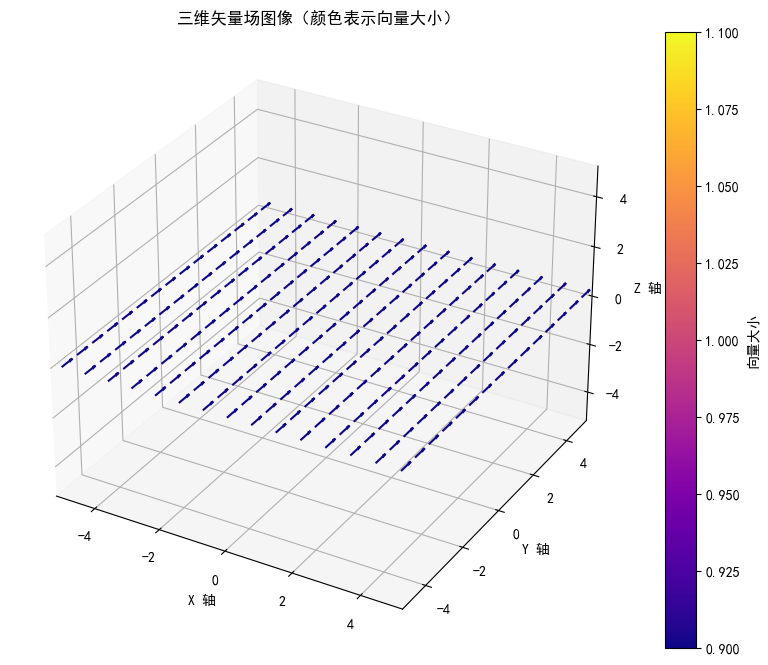

In [23]:
import numpy as np
import sympy as sp
from sympy.vector import CoordSys3D, divergence
from IPython.display import display

import matplotlib.pyplot as plt
from matplotlib import rcParams, cm  # 引入 cm 用于颜色映射
from mpl_toolkits.mplot3d import Axes3D  # 用于 3D 绘图

# 设置字体，防止中文乱码
rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
rcParams['axes.unicode_minus'] = False    # 解决负号无法正常显示的问题

# 定义矢量场函数
def vector_field(x_vals, y_vals, z_vals):
    # 创建一个三维坐标系
    N = CoordSys3D('N')
    # 定义矢量场
    A = N.j
    print('矢量场：')
    display(A)

    # 计算矢量场的散度
    div_A = divergence(A)
    print("矢量场的散度 (∇·A):")
    display(div_A)
    
    # 提取矢量场 A 在 x, y, z 方向的分量
    Ax = A & N.i
    Ay = A & N.j
    Az = A & N.k
    # 初始化 x, y, z 分量数组
    A_x = np.zeros_like(x_vals, dtype=float)
    A_y = np.zeros_like(y_vals, dtype=float)
    A_z = np.zeros_like(z_vals, dtype=float)
    magnitudes = np.zeros_like(x_vals, dtype=float)  # 用于存储向量大小
    
    for i in range(x_vals.shape[0]):
        for j in range(x_vals.shape[1]):
            for k in range(x_vals.shape[2]):
                # 在每个点上计算矢量场的分量
                A_x[i, j, k] = float(Ax.subs({N.x: x_vals[i, j, k], N.y: y_vals[i, j, k], N.z: z_vals[i, j, k]}))
                A_y[i, j, k] = float(Ay.subs({N.x: x_vals[i, j, k], N.y: y_vals[i, j, k], N.z: z_vals[i, j, k]}))
                A_z[i, j, k] = float(Az.subs({N.x: x_vals[i, j, k], N.y: y_vals[i, j, k], N.z: z_vals[i, j, k]}))
                # 计算每个向量的大小
                magnitudes[i, j, k] = np.sqrt(A_x[i, j, k]**2 + A_y[i, j, k]**2 + A_z[i, j, k]**2)
    return A_x, A_y, A_z, magnitudes

# 创建网格点
x = np.linspace(-5, 5, 15)
y = np.linspace(-5, 5, 15)
z = np.linspace(0, 0, 1)
X, Y, Z = np.meshgrid(x, y, z)

# 计算每个网格点的矢量场分量和大小
A_x, A_y, A_z, magnitudes = vector_field(X, Y, Z)

# 绘制 3D 矢量场
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 将向量大小映射到颜色
norm = plt.Normalize(magnitudes.min(), magnitudes.max())
colors = cm.plasma(norm(magnitudes))

# 绘制矢量场，使用颜色表示大小
quiver = ax.quiver(X, Y, Z, A_x, A_y, A_z, length=0.5, normalize=True, color=colors.reshape(-1, 4), cmap='plasma')

# 添加颜色条
sm = plt.cm.ScalarMappable(cmap='plasma', norm=norm)
sm.set_array([])
fig.colorbar(sm, ax=ax, label='向量大小')

ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
ax.set_zlim([-5, 5])
ax.set_xlabel('X 轴')
ax.set_ylabel('Y 轴')
ax.set_zlabel('Z 轴')
ax.set_title('三维矢量场图像（颜色表示向量大小）')
plt.savefig('3D_vector_field.png')
plt.show()

矢量场：


N.j

矢量场的散度 (∇·A):


0

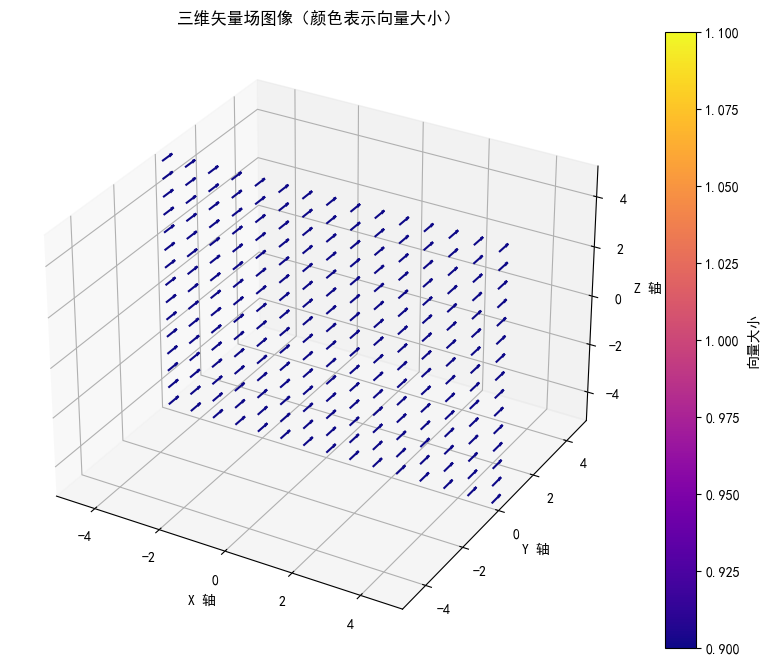

In [24]:
import numpy as np
import sympy as sp
from sympy.vector import CoordSys3D, divergence
from IPython.display import display

import matplotlib.pyplot as plt
from matplotlib import rcParams, cm  # 引入 cm 用于颜色映射
from mpl_toolkits.mplot3d import Axes3D  # 用于 3D 绘图

# 设置字体，防止中文乱码
rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
rcParams['axes.unicode_minus'] = False    # 解决负号无法正常显示的问题

# 定义矢量场函数
def vector_field(x_vals, y_vals, z_vals):
    # 创建一个三维坐标系
    N = CoordSys3D('N')
    # 定义矢量场
    A = N.j
    print('矢量场：')
    display(A)

    # 计算矢量场的散度
    div_A = divergence(A)
    print("矢量场的散度 (∇·A):")
    display(div_A)
    
    # 提取矢量场 A 在 x, y, z 方向的分量
    Ax = A & N.i
    Ay = A & N.j
    Az = A & N.k
    # 初始化 x, y, z 分量数组
    A_x = np.zeros_like(x_vals, dtype=float)
    A_y = np.zeros_like(y_vals, dtype=float)
    A_z = np.zeros_like(z_vals, dtype=float)
    magnitudes = np.zeros_like(x_vals, dtype=float)  # 用于存储向量大小
    
    for i in range(x_vals.shape[0]):
        for j in range(x_vals.shape[1]):
            for k in range(x_vals.shape[2]):
                # 在每个点上计算矢量场的分量
                A_x[i, j, k] = float(Ax.subs({N.x: x_vals[i, j, k], N.y: y_vals[i, j, k], N.z: z_vals[i, j, k]}))
                A_y[i, j, k] = float(Ay.subs({N.x: x_vals[i, j, k], N.y: y_vals[i, j, k], N.z: z_vals[i, j, k]}))
                A_z[i, j, k] = float(Az.subs({N.x: x_vals[i, j, k], N.y: y_vals[i, j, k], N.z: z_vals[i, j, k]}))
                # 计算每个向量的大小
                magnitudes[i, j, k] = np.sqrt(A_x[i, j, k]**2 + A_y[i, j, k]**2 + A_z[i, j, k]**2)
    return A_x, A_y, A_z, magnitudes

# 创建网格点
x = np.linspace(-5, 5, 15)
y = np.linspace(0, 0, 1)
z = np.linspace(-5, 5, 15)
X, Y, Z = np.meshgrid(x, y, z)

# 计算每个网格点的矢量场分量和大小
A_x, A_y, A_z, magnitudes = vector_field(X, Y, Z)

# 绘制 3D 矢量场
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 将向量大小映射到颜色
norm = plt.Normalize(magnitudes.min(), magnitudes.max())
colors = cm.plasma(norm(magnitudes))

# 绘制矢量场，使用颜色表示大小
quiver = ax.quiver(X, Y, Z, A_x, A_y, A_z, length=0.5, normalize=True, color=colors.reshape(-1, 4), cmap='plasma')

# 添加颜色条
sm = plt.cm.ScalarMappable(cmap='plasma', norm=norm)
sm.set_array([])
fig.colorbar(sm, ax=ax, label='向量大小')

ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
ax.set_zlim([-5, 5])
ax.set_xlabel('X 轴')
ax.set_ylabel('Y 轴')
ax.set_zlabel('Z 轴')
ax.set_title('三维矢量场图像（颜色表示向量大小）')
plt.savefig('3D_vector_field.png')
plt.show()

## 矢量场散度的例子：单个方向越来越大的矢量场

#### 先绘出其二维图像

矢量场：


N.y*N.j

矢量场的散度 (∇·A):


1

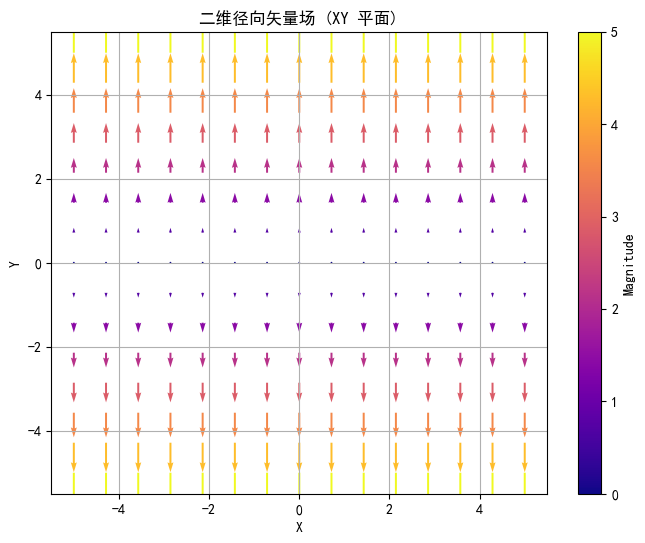

In [27]:
import numpy as np
import sympy as sp
from sympy.vector import CoordSys3D, divergence
from IPython.display import display

import matplotlib.pyplot as plt
from matplotlib import rcParams
# 设置字体，防止中文乱码
rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
rcParams['axes.unicode_minus'] = False    # 解决负号无法正常显示的问题

# 定义矢量场函数
def vector_field(x_vals, y_vals, z_vals):
    
    # 创建一个三维坐标系
    N = CoordSys3D('N')
    # 定义矢量场
    A = N.y * N.j
    print('矢量场：')
    display(A)

    # 计算矢量场的散度
    div_A = divergence(A)
    # 输出散度
    print("矢量场的散度 (∇·A):")
    display(div_A)
    
    # 提取矢量场 A 在 x, y, z 方向的分量
    Ax = A & N.i
    Ay = A & N.j
    Az = A & N.k
    # 计算 x, y, z 方向的分量
    A_x = np.zeros_like(x_vals, dtype=float)
    A_y = np.zeros_like(y_vals, dtype=float)
    A_z = np.zeros_like(z_vals, dtype=float)
    
    for i in range(x_vals.shape[0]):
        for j in range(x_vals.shape[1]):
            for k in range(x_vals.shape[2]):
                A_x[i, j, k] = float(Ax.subs({N.x: x_vals[i, j, k], N.y: y_vals[i, j, k], N.z: z_vals[i, j, k]}))
                A_y[i, j, k] = float(Ay.subs({N.x: x_vals[i, j, k], N.y: y_vals[i, j, k], N.z: z_vals[i, j, k]}))
                A_z[i, j, k] = float(Az.subs({N.x: x_vals[i, j, k], N.y: y_vals[i, j, k], N.z: z_vals[i, j, k]}))
    return A_x, A_y, A_z

# 创建网格点
x = np.linspace(-5, 5, 15)
y = np.linspace(-5, 5, 15)
z = np.linspace(-5, 5, 15)
X, Y, Z = np.meshgrid(x, y, z)

# 计算每个网格点的矢量场分量
A_x, A_y, A_z = vector_field(X, Y, Z)

# 绘制矢量场
plt.figure(figsize=(8, 6))
plt.quiver(X[:, :, 0], Y[:, :, 0], A_x[:, :, 0], A_y[:, :, 0], np.sqrt(A_x[:, :, 0]**2 + A_y[:, :, 0]**2), cmap='plasma')
plt.colorbar(label='Magnitude')
plt.title('二维径向矢量场 (XY 平面)')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

#### 画出三维图像

矢量场：


N.y*N.j

矢量场的散度 (∇·A):


1

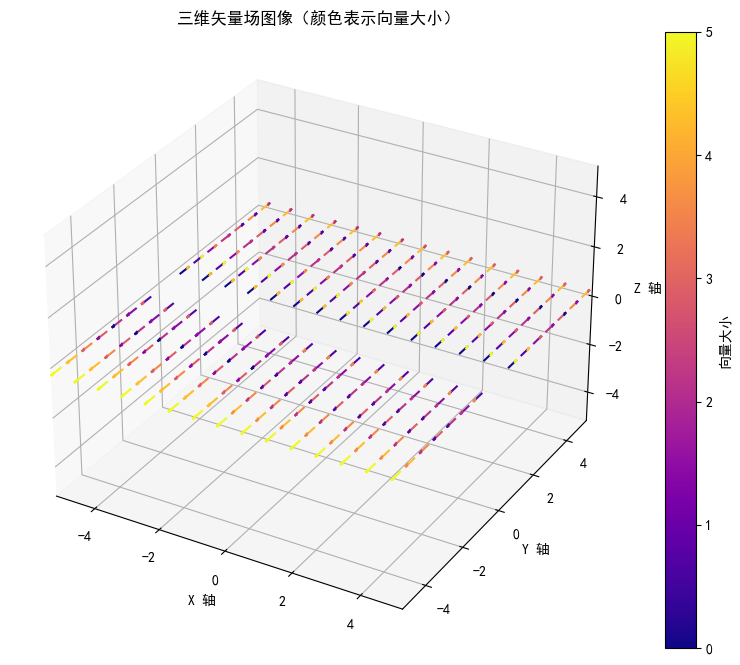

In [29]:
import numpy as np
import sympy as sp
from sympy.vector import CoordSys3D, divergence
from IPython.display import display

import matplotlib.pyplot as plt
from matplotlib import rcParams, cm  # 引入 cm 用于颜色映射
from mpl_toolkits.mplot3d import Axes3D  # 用于 3D 绘图

# 设置字体，防止中文乱码
rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
rcParams['axes.unicode_minus'] = False    # 解决负号无法正常显示的问题

# 定义矢量场函数
def vector_field(x_vals, y_vals, z_vals):
    # 创建一个三维坐标系
    N = CoordSys3D('N')
    # 定义矢量场
    A = N.y * N.j
    print('矢量场：')
    display(A)

    # 计算矢量场的散度
    div_A = divergence(A)
    print("矢量场的散度 (∇·A):")
    display(div_A)
    
    # 提取矢量场 A 在 x, y, z 方向的分量
    Ax = A & N.i
    Ay = A & N.j
    Az = A & N.k
    # 初始化 x, y, z 分量数组
    A_x = np.zeros_like(x_vals, dtype=float)
    A_y = np.zeros_like(y_vals, dtype=float)
    A_z = np.zeros_like(z_vals, dtype=float)
    magnitudes = np.zeros_like(x_vals, dtype=float)  # 用于存储向量大小
    
    for i in range(x_vals.shape[0]):
        for j in range(x_vals.shape[1]):
            for k in range(x_vals.shape[2]):
                # 在每个点上计算矢量场的分量
                A_x[i, j, k] = float(Ax.subs({N.x: x_vals[i, j, k], N.y: y_vals[i, j, k], N.z: z_vals[i, j, k]}))
                A_y[i, j, k] = float(Ay.subs({N.x: x_vals[i, j, k], N.y: y_vals[i, j, k], N.z: z_vals[i, j, k]}))
                A_z[i, j, k] = float(Az.subs({N.x: x_vals[i, j, k], N.y: y_vals[i, j, k], N.z: z_vals[i, j, k]}))
                # 计算每个向量的大小
                magnitudes[i, j, k] = np.sqrt(A_x[i, j, k]**2 + A_y[i, j, k]**2 + A_z[i, j, k]**2)
    return A_x, A_y, A_z, magnitudes

# 创建网格点
x = np.linspace(-5, 5, 15)
y = np.linspace(-5, 5, 15)
z = np.linspace(0, 0, 1)
X, Y, Z = np.meshgrid(x, y, z)

# 计算每个网格点的矢量场分量和大小
A_x, A_y, A_z, magnitudes = vector_field(X, Y, Z)

# 绘制 3D 矢量场
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 将向量大小映射到颜色
norm = plt.Normalize(magnitudes.min(), magnitudes.max())
colors = cm.plasma(norm(magnitudes))

# 绘制矢量场，使用颜色表示大小
quiver = ax.quiver(X, Y, Z, A_x, A_y, A_z, length=0.5, normalize=True, color=colors.reshape(-1, 4), cmap='plasma')

# 添加颜色条
sm = plt.cm.ScalarMappable(cmap='plasma', norm=norm)
sm.set_array([])
fig.colorbar(sm, ax=ax, label='向量大小')

ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
ax.set_zlim([-5, 5])
ax.set_xlabel('X 轴')
ax.set_ylabel('Y 轴')
ax.set_zlabel('Z 轴')
ax.set_title('三维矢量场图像（颜色表示向量大小）')
plt.savefig('3D_vector_field.png')
plt.show()

### 习题1.16 画出矢量函数
$$
  \boldsymbol v = \frac{\hat{\boldsymbol r}}{r^2}
$$
的草图，并计算出它的散度。
结果可能会使你惊讶……你可以解释它吗?


In [34]:
import sympy as sp
from sympy.vector import CoordSys3D, divergence
from IPython.display import display

# 创建一个三维坐标系
N = CoordSys3D('N')

# 定义矢量场 A
# 假设 A = x * i + y * j 
A = (N.x * N.i + N.y * N.j + N.z * N.k)/ ( (sp.sqrt(N.x**2 + N.y**2 + N.z**2)) ** 3)
print("矢量场 A 为：")
display(A)

# 计算散度
div_A = divergence(A)
print("计算其散度为：")
display(div_A)
print("散度化简为：")
div_A = sp.simplify(div_A)
display(div_A)

矢量场 A 为：


(N.x/(N.x**2 + N.y**2 + N.z**2)**(3/2))*N.i + (N.y/(N.x**2 + N.y**2 + N.z**2)**(3/2))*N.j + (N.z/(N.x**2 + N.y**2 + N.z**2)**(3/2))*N.k

计算其散度为：


-3*N.x**2/(N.x**2 + N.y**2 + N.z**2)**(5/2) - 3*N.y**2/(N.x**2 + N.y**2 + N.z**2)**(5/2) - 3*N.z**2/(N.x**2 + N.y**2 + N.z**2)**(5/2) + 3/(N.x**2 + N.y**2 + N.z**2)**(3/2)

散度化简为：


0

#### 绘出其二维图像

矢量场：


(N.x/(N.x**2 + N.y**2 + N.z**2)**(3/2))*N.i + (N.y/(N.x**2 + N.y**2 + N.z**2)**(3/2))*N.j + (N.z/(N.x**2 + N.y**2 + N.z**2)**(3/2))*N.k

矢量场的散度 (∇·A):


0

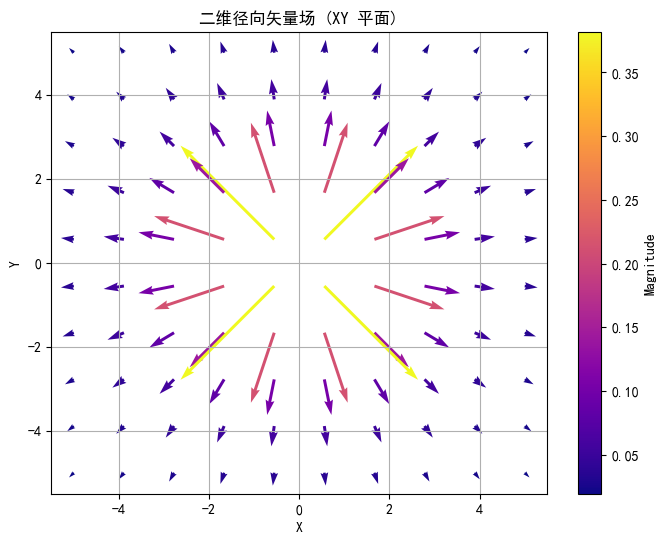

In [41]:
import numpy as np
import sympy as sp
from sympy.vector import CoordSys3D, divergence
from IPython.display import display

import matplotlib.pyplot as plt
from matplotlib import rcParams
# 设置字体，防止中文乱码
rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
rcParams['axes.unicode_minus'] = False    # 解决负号无法正常显示的问题

# 定义矢量场函数
def vector_field(x_vals, y_vals, z_vals):
    
    # 创建一个三维坐标系
    N = CoordSys3D('N')
    # 定义矢量场
    A = (N.x * N.i + N.y * N.j + N.z * N.k)/ ( (sp.sqrt(N.x**2 + N.y**2 + N.z**2)) ** 3)
    print('矢量场：')
    display(A)

    # 计算矢量场的散度
    div_A = divergence(A)
    div_A = sp.simplify(div_A)
    # 输出散度
    print("矢量场的散度 (∇·A):")
    display(div_A)
    
    # 提取矢量场 A 在 x, y, z 方向的分量
    Ax = A & N.i
    Ay = A & N.j
    Az = A & N.k
    # 计算 x, y, z 方向的分量
    A_x = np.zeros_like(x_vals, dtype=float)
    A_y = np.zeros_like(y_vals, dtype=float)
    A_z = np.zeros_like(z_vals, dtype=float)
    
    for i in range(x_vals.shape[0]):
        for j in range(x_vals.shape[1]):
            for k in range(x_vals.shape[2]):
                A_x[i, j, k] = float(Ax.subs({N.x: x_vals[i, j, k], N.y: y_vals[i, j, k], N.z: z_vals[i, j, k]}))
                A_y[i, j, k] = float(Ay.subs({N.x: x_vals[i, j, k], N.y: y_vals[i, j, k], N.z: z_vals[i, j, k]}))
                A_z[i, j, k] = float(Az.subs({N.x: x_vals[i, j, k], N.y: y_vals[i, j, k], N.z: z_vals[i, j, k]}))
    return A_x, A_y, A_z

# 创建网格点
x = np.linspace(-5, 5, 10)
y = np.linspace(-5, 5, 10)
z = np.linspace(1, 1, 1)
X, Y, Z = np.meshgrid(x, y, z)

# 计算每个网格点的矢量场分量
A_x, A_y, A_z = vector_field(X, Y, Z)

# 绘制矢量场
plt.figure(figsize=(8, 6))
plt.quiver(X[:, :, 0], Y[:, :, 0], A_x[:, :, 0], A_y[:, :, 0], np.sqrt(A_x[:, :, 0]**2 + A_y[:, :, 0]**2), cmap='plasma')
plt.colorbar(label='Magnitude')
plt.title('二维径向矢量场 (XY 平面)')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

矢量场：


(N.x/(N.x**2 + N.y**2 + N.z**2)**(3/2))*N.i + (N.y/(N.x**2 + N.y**2 + N.z**2)**(3/2))*N.j + (N.z/(N.x**2 + N.y**2 + N.z**2)**(3/2))*N.k

矢量场的散度 (∇·A):


0

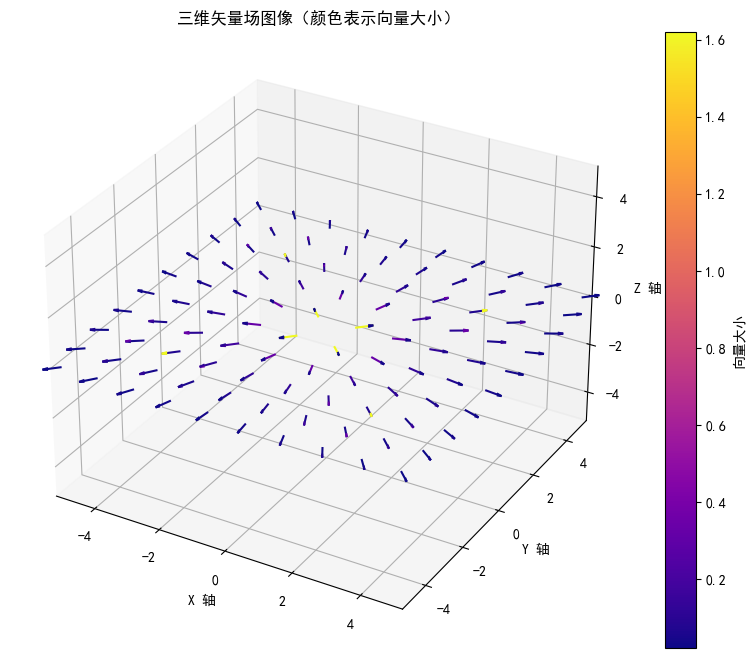

In [51]:
import numpy as np
import sympy as sp
from sympy.vector import CoordSys3D, divergence
from IPython.display import display

import matplotlib.pyplot as plt
from matplotlib import rcParams, cm  # 引入 cm 用于颜色映射
from mpl_toolkits.mplot3d import Axes3D  # 用于 3D 绘图

# 设置字体，防止中文乱码
rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
rcParams['axes.unicode_minus'] = False    # 解决负号无法正常显示的问题

# 定义矢量场函数
def vector_field(x_vals, y_vals, z_vals):
    # 创建一个三维坐标系
    N = CoordSys3D('N')
    # 定义矢量场
    A = (N.x * N.i + N.y * N.j + N.z * N.k)/ ( (sp.sqrt(N.x**2 + N.y**2 + N.z**2)) ** 3)
    print('矢量场：')
    display(A)

    # 计算矢量场的散度
    div_A = divergence(A)
    div_A = sp.simplify(div_A)
    print("矢量场的散度 (∇·A):")
    display(div_A)
    
    # 提取矢量场 A 在 x, y, z 方向的分量
    Ax = A & N.i
    Ay = A & N.j
    Az = A & N.k
    # 初始化 x, y, z 分量数组
    A_x = np.zeros_like(x_vals, dtype=float)
    A_y = np.zeros_like(y_vals, dtype=float)
    A_z = np.zeros_like(z_vals, dtype=float)
    magnitudes = np.zeros_like(x_vals, dtype=float)  # 用于存储向量大小
    
    for i in range(x_vals.shape[0]):
        for j in range(x_vals.shape[1]):
            for k in range(x_vals.shape[2]):
                # 在每个点上计算矢量场的分量
                A_x[i, j, k] = float(Ax.subs({N.x: x_vals[i, j, k], N.y: y_vals[i, j, k], N.z: z_vals[i, j, k]}))
                A_y[i, j, k] = float(Ay.subs({N.x: x_vals[i, j, k], N.y: y_vals[i, j, k], N.z: z_vals[i, j, k]}))
                A_z[i, j, k] = float(Az.subs({N.x: x_vals[i, j, k], N.y: y_vals[i, j, k], N.z: z_vals[i, j, k]}))
                # 计算每个向量的大小
                magnitudes[i, j, k] = np.sqrt(A_x[i, j, k]**2 + A_y[i, j, k]**2 + A_z[i, j, k]**2)
    return A_x, A_y, A_z, magnitudes

# 创建网格点
x = np.linspace(-5, 5, 10)
y = np.linspace(-5, 5, 10)
z = np.linspace(0, 0, 1)
X, Y, Z = np.meshgrid(x, y, z)

# 计算每个网格点的矢量场分量和大小
A_x, A_y, A_z, magnitudes = vector_field(X, Y, Z)

# 绘制 3D 矢量场
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 将向量大小映射到颜色
norm = plt.Normalize(magnitudes.min(), magnitudes.max())
colors = cm.plasma(norm(magnitudes))

# 绘制矢量场，使用颜色表示大小
quiver = ax.quiver(X, Y, Z, A_x, A_y, A_z, length=0.5, normalize=True, color=colors.reshape(-1, 4), cmap='plasma')

# 添加颜色条
sm = plt.cm.ScalarMappable(cmap='plasma', norm=norm)
sm.set_array([])
fig.colorbar(sm, ax=ax, label='向量大小')

ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
ax.set_zlim([-5, 5])
ax.set_xlabel('X 轴')
ax.set_ylabel('Y 轴')
ax.set_zlabel('Z 轴')
ax.set_title('三维矢量场图像（颜色表示向量大小）')
plt.show()

矢量场：


(N.x/(N.x**2 + N.y**2 + N.z**2)**(3/2))*N.i + (N.y/(N.x**2 + N.y**2 + N.z**2)**(3/2))*N.j + (N.z/(N.x**2 + N.y**2 + N.z**2)**(3/2))*N.k

矢量场的散度 (∇·A):


0

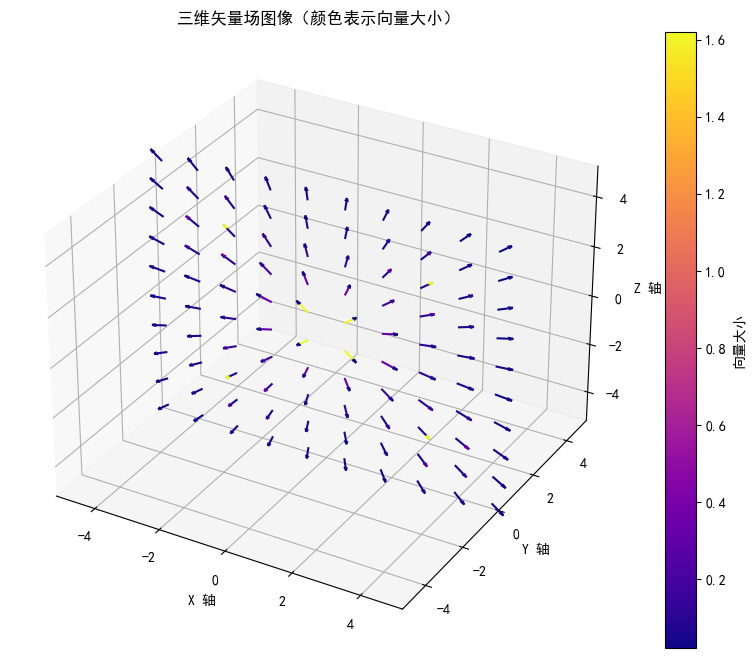

In [52]:
import numpy as np
import sympy as sp
from sympy.vector import CoordSys3D, divergence
from IPython.display import display

import matplotlib.pyplot as plt
from matplotlib import rcParams, cm  # 引入 cm 用于颜色映射
from mpl_toolkits.mplot3d import Axes3D  # 用于 3D 绘图

# 设置字体，防止中文乱码
rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
rcParams['axes.unicode_minus'] = False    # 解决负号无法正常显示的问题

# 定义矢量场函数
def vector_field(x_vals, y_vals, z_vals):
    # 创建一个三维坐标系
    N = CoordSys3D('N')
    # 定义矢量场
    A = (N.x * N.i + N.y * N.j + N.z * N.k)/ ( (sp.sqrt(N.x**2 + N.y**2 + N.z**2)) ** 3)
    print('矢量场：')
    display(A)

    # 计算矢量场的散度
    div_A = divergence(A)
    div_A = sp.simplify(div_A)
    print("矢量场的散度 (∇·A):")
    display(div_A)
    
    # 提取矢量场 A 在 x, y, z 方向的分量
    Ax = A & N.i
    Ay = A & N.j
    Az = A & N.k
    # 初始化 x, y, z 分量数组
    A_x = np.zeros_like(x_vals, dtype=float)
    A_y = np.zeros_like(y_vals, dtype=float)
    A_z = np.zeros_like(z_vals, dtype=float)
    magnitudes = np.zeros_like(x_vals, dtype=float)  # 用于存储向量大小
    
    for i in range(x_vals.shape[0]):
        for j in range(x_vals.shape[1]):
            for k in range(x_vals.shape[2]):
                # 在每个点上计算矢量场的分量
                A_x[i, j, k] = float(Ax.subs({N.x: x_vals[i, j, k], N.y: y_vals[i, j, k], N.z: z_vals[i, j, k]}))
                A_y[i, j, k] = float(Ay.subs({N.x: x_vals[i, j, k], N.y: y_vals[i, j, k], N.z: z_vals[i, j, k]}))
                A_z[i, j, k] = float(Az.subs({N.x: x_vals[i, j, k], N.y: y_vals[i, j, k], N.z: z_vals[i, j, k]}))
                # 计算每个向量的大小
                magnitudes[i, j, k] = np.sqrt(A_x[i, j, k]**2 + A_y[i, j, k]**2 + A_z[i, j, k]**2)
    return A_x, A_y, A_z, magnitudes

# 创建网格点
x = np.linspace(-5, 5, 10)
y = np.linspace(0, 0, 1)
z = np.linspace(-5, 5, 10)
X, Y, Z = np.meshgrid(x, y, z)

# 计算每个网格点的矢量场分量和大小
A_x, A_y, A_z, magnitudes = vector_field(X, Y, Z)

# 绘制 3D 矢量场
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 将向量大小映射到颜色
norm = plt.Normalize(magnitudes.min(), magnitudes.max())
colors = cm.plasma(norm(magnitudes))

# 绘制矢量场，使用颜色表示大小
quiver = ax.quiver(X, Y, Z, A_x, A_y, A_z, length=0.5, normalize=True, color=colors.reshape(-1, 4), cmap='plasma')

# 添加颜色条
sm = plt.cm.ScalarMappable(cmap='plasma', norm=norm)
sm.set_array([])
fig.colorbar(sm, ax=ax, label='向量大小')

ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
ax.set_zlim([-5, 5])
ax.set_xlabel('X 轴')
ax.set_ylabel('Y 轴')
ax.set_zlabel('Z 轴')
ax.set_title('三维矢量场图像（颜色表示向量大小）')
plt.savefig('3D_vector_field.png')
plt.show()

## 求抽象向量场的散度

In [ ]:
import sympy as sp
from sympy.vector import CoordSys3D, divergence
from sympy import Function
from IPython.display import display

# 创建一个三维坐标系
N = CoordSys3D('N')

# 定义抽象的向量场 A(x, y, z)
A_x, A_y, A_z = Function('A_x')(N.x, N.y, N.z), Function('A_y')(N.x, N.y, N.z), Function('A_z')(N.x, N.y, N.z)
A = A_x*N.i + A_y*N.j + A_z*N.k  # 抽象向量场 A
print("抽象向量场 A 为：")
display(A)

# 散度运算
div_A = divergence(A)  # 使用 & 运算符进行散度计算
print("\n散度 (∇·A):")
display(div_A)

抽象向量场 A 为：


(A_x(N.x, N.y, N.z))*N.i + (A_y(N.x, N.y, N.z))*N.j + (A_z(N.x, N.y, N.z))*N.k


散度 (∇·A):


Derivative(A_x(N.x, N.y, N.z), N.x) + Derivative(A_y(N.x, N.y, N.z), N.y) + Derivative(A_z(N.x, N.y, N.z), N.z)

In [58]:
# 同时代入 Ax = x, Ay = y, Az = z
div_A_specific = div_A.subs({A_x: N.x, A_y: N.y, A_z: N.z})

print("\n代入 Ax = x, Ay = y, Az = z 后的散度 (∇·A):")
display(div_A_specific)
print("化简为：")
display(sp.simplify(div_A_specific))


代入 Ax = x, Ay = y, Az = z 后的散度 (∇·A):


Derivative(N.x, N.x) + Derivative(N.y, N.y) + Derivative(N.z, N.z)

化简为：


3

### 习题1.17
对二维情况，证明在转动变换下散度的变换满足标量的变换规律。

In [7]:
import sympy as sp
from sympy.vector import CoordSys3D, divergence
from sympy import Function
from IPython.display import display
from IPython.display import HTML

# 创建一个三维坐标系
O = CoordSys3D('O')

# 定义一个抽象矢量场
A_x, A_y, A_z = Function('A_x')(O.x, O.y, O.z), Function('A_y')(O.x, O.y, O.z), Function('A_z')(O.x, O.y, O.z)
A = A_x*O.i + A_y*O.j + A_z*O.k  # 抽象向量场 A
print("抽象向量场 A 为：")
display(A)

div_A = divergence(A, O)
print("散度 ∇·A:")
display(div_A)

# 分割线
display(HTML('<hr style="height:1px;border:none;border-top:1px solid #f00;">'))

print('如果固定x轴，让y,z绕着x轴旋转phi角度')
# 创建一个新三维坐标系
N = CoordSys3D('N')
# 旋转了phi 的角度
phi = sp.symbols('phi')
# 得到 A 在新坐标系中的表示
print("替换 A 中的基底，通过向量关系把新的分量和旧的分量联系起来")
A_new = A.subs({O.i: N.i, O.j: (sp.cos(phi)*N.j + (-sp.sin(phi)*N.k)), O.k: (sp.sin(phi)*N.j  + sp.cos(phi)*N.k)})
display(A_new)
print("替换 A 中的坐标，通过坐标变换(变量代换)把导数的结果联系起来：")
A_new = A_new.subs({O.x: N.x, O.y: (sp.cos(phi)*N.y - sp.sin(phi)*N.z), O.z: (sp.sin(phi)*N.y  + sp.cos(phi)*N.z)})
display(A_new)

grad_A_new = divergence(A_new, N)
print('如果固定x轴，让y,z绕着x轴旋转phi角度，那么 A 在新坐标系中的散度为：')
display(grad_A_new)
print('化简：')
grad_A_new = sp.simplify(grad_A_new)
display(grad_A_new)
print('可见梯度是满足矢量变换规律的，也可以采用更加明显的形式：')
result = grad_A_new.subs({N.x: O.x, (sp.cos(phi)*N.y - sp.sin(phi)*N.z): O.y, (sp.sin(phi)*N.y  + sp.cos(phi)*N.z): O.z})
display(result)

抽象向量场 A 为：


(A_x(O.x, O.y, O.z))*O.i + (A_y(O.x, O.y, O.z))*O.j + (A_z(O.x, O.y, O.z))*O.k

散度 ∇·A:


Derivative(A_x(O.x, O.y, O.z), O.x) + Derivative(A_y(O.x, O.y, O.z), O.y) + Derivative(A_z(O.x, O.y, O.z), O.z)

如果固定x轴，让y,z绕着x轴旋转phi角度
替换 A 中的基底，通过向量关系把新的分量和旧的分量联系起来


(A_x(O.x, O.y, O.z))*N.i + (A_y(O.x, O.y, O.z)*cos(phi) + A_z(O.x, O.y, O.z)*sin(phi))*N.j + (-A_y(O.x, O.y, O.z)*sin(phi) + A_z(O.x, O.y, O.z)*cos(phi))*N.k

替换 A 中的坐标，通过坐标变换(变量代换)把导数的结果联系起来：


(A_x(N.x, N.y*cos(phi) - N.z*sin(phi), N.y*sin(phi) + N.z*cos(phi)))*N.i + (A_y(N.x, N.y*cos(phi) - N.z*sin(phi), N.y*sin(phi) + N.z*cos(phi))*cos(phi) + A_z(N.x, N.y*cos(phi) - N.z*sin(phi), N.y*sin(phi) + N.z*cos(phi))*sin(phi))*N.j + (-A_y(N.x, N.y*cos(phi) - N.z*sin(phi), N.y*sin(phi) + N.z*cos(phi))*sin(phi) + A_z(N.x, N.y*cos(phi) - N.z*sin(phi), N.y*sin(phi) + N.z*cos(phi))*cos(phi))*N.k

如果固定x轴，让y,z绕着x轴旋转phi角度，那么 A 在新坐标系中的散度为：


(sin(phi)*Subs(Derivative(A_y(N.x, _xi_2, N.y*sin(phi) + N.z*cos(phi)), _xi_2), _xi_2, N.y*cos(phi) - N.z*sin(phi)) - cos(phi)*Subs(Derivative(A_y(N.x, N.y*cos(phi) - N.z*sin(phi), _xi_3), _xi_3), _xi_3, N.y*sin(phi) + N.z*cos(phi)))*sin(phi) + (sin(phi)*Subs(Derivative(A_y(N.x, N.y*cos(phi) - N.z*sin(phi), _xi_3), _xi_3), _xi_3, N.y*sin(phi) + N.z*cos(phi)) + cos(phi)*Subs(Derivative(A_y(N.x, _xi_2, N.y*sin(phi) + N.z*cos(phi)), _xi_2), _xi_2, N.y*cos(phi) - N.z*sin(phi)))*cos(phi) + (-sin(phi)*Subs(Derivative(A_z(N.x, _xi_2, N.y*sin(phi) + N.z*cos(phi)), _xi_2), _xi_2, N.y*cos(phi) - N.z*sin(phi)) + cos(phi)*Subs(Derivative(A_z(N.x, N.y*cos(phi) - N.z*sin(phi), _xi_3), _xi_3), _xi_3, N.y*sin(phi) + N.z*cos(phi)))*cos(phi) + (sin(phi)*Subs(Derivative(A_z(N.x, N.y*cos(phi) - N.z*sin(phi), _xi_3), _xi_3), _xi_3, N.y*sin(phi) + N.z*cos(phi)) + cos(phi)*Subs(Derivative(A_z(N.x, _xi_2, N.y*sin(phi) + N.z*cos(phi)), _xi_2), _xi_2, N.y*cos(phi) - N.z*sin(phi)))*sin(phi) + Derivative(A_x(N.x,

化简：


sin(phi)**2*Subs(Derivative(A_y(N.x, _xi_2, N.y*sin(phi) + N.z*cos(phi)), _xi_2), _xi_2, N.y*cos(phi) - N.z*sin(phi)) + sin(phi)**2*Subs(Derivative(A_z(N.x, N.y*cos(phi) - N.z*sin(phi), _xi_3), _xi_3), _xi_3, N.y*sin(phi) + N.z*cos(phi)) + cos(phi)**2*Subs(Derivative(A_y(N.x, _xi_2, N.y*sin(phi) + N.z*cos(phi)), _xi_2), _xi_2, N.y*cos(phi) - N.z*sin(phi)) + cos(phi)**2*Subs(Derivative(A_z(N.x, N.y*cos(phi) - N.z*sin(phi), _xi_3), _xi_3), _xi_3, N.y*sin(phi) + N.z*cos(phi)) + Derivative(A_x(N.x, N.y*cos(phi) - N.z*sin(phi), N.y*sin(phi) + N.z*cos(phi)), N.x)

可见梯度是满足矢量变换规律的，也可以采用更加明显的形式：


sin(phi)**2*Subs(Derivative(A_y(O.x, _xi_2, O.z), _xi_2), _xi_2, O.y) + sin(phi)**2*Subs(Derivative(A_z(O.x, O.y, _xi_3), _xi_3), _xi_3, O.z) + cos(phi)**2*Subs(Derivative(A_y(O.x, _xi_2, O.z), _xi_2), _xi_2, O.y) + cos(phi)**2*Subs(Derivative(A_z(O.x, O.y, _xi_3), _xi_3), _xi_3, O.z) + Derivative(A_x(O.x, O.y, O.z), O.x)

In [1]:
import sympy as sp
from sympy.vector import CoordSys3D, divergence, gradient
from sympy import Function
from IPython.display import display
from IPython.display import HTML

# 创建一个三维坐标系
O = CoordSys3D('O')

# 定义一个抽象矢量场
A_x, A_y, A_z = Function('A_x')(O.x, O.y, O.z), Function('A_y')(O.x, O.y, O.z), Function('A_z')(O.x, O.y, O.z)
A = A_x*O.i + A_y*O.j + A_z*O.k  # 抽象向量场 A
print("抽象向量场 A 的矩阵形式：")
matrix_A = A.to_matrix(O)
display(matrix_A)

div_A = divergence(A, O)
print("散度 ∇·A:")
display(div_A)

# 分割线
display(HTML('<hr style="height:1px;border:none;border-top:1px solid #f00;">'))

print('如果固定x轴，让y,z绕着x轴旋转phi角度')
# 创建一个新三维坐标系
N = CoordSys3D('N')
# 旋转了phi 的角度
phi = sp.symbols('phi')
# 得到 A 在新坐标系中的表示
print("替换 A 中的基底，等价于坐标变换矩阵作用在向量 A 上：")
O_in_N = sp.Matrix([[1, 0, 0], [0, sp.cos(phi), sp.sin(phi)], [0, -sp.sin(phi), sp.cos(phi)]])
A_new = O_in_N * matrix_A
display(A_new)
print('接下来，只要各分量求偏导就可以了，只要注意到分量通过旧坐标间接的成为新基的函数就可以了。我们倾向于求梯度，再筛选出所需信息。')
# 分割线
display(HTML('<hr style="height:1px;border:none;border-top:1px solid #f00;">'))

print("替换 A 中的坐标，梯度的变换等价于变换矩阵作用在梯度上，这是梯度小结的结论。")
grad_Ax = gradient(A_x, O)
grad_Ax_matrix = grad_Ax.to_matrix(O)
print("在新基里 A_x 的梯度等于变换矩阵作用在原来的梯度上：")
display(O_in_N * grad_Ax_matrix)
grad_Ay = gradient(A_y, O)
grad_Ay_matrix = grad_Ay.to_matrix(O)
print("在新基里 A_y 的梯度等于变换矩阵作用在原来的梯度上：")
grad_Az = gradient(A_z, O)
grad_Az_matrix = grad_Az.to_matrix(O)
display(O_in_N * grad_Az_matrix)
print("在新基里 A_z 的梯度等于变换矩阵作用在原来的梯度上：")
display(O_in_N * grad_Az_matrix)
# 合并变换前的梯度矩阵
grad_A_matrix = sp.Matrix.hstack(grad_Ax_matrix, grad_Ay_matrix, grad_Az_matrix)
print("变换前，合并后的梯度矩阵：")
display(grad_A_matrix)
# 合并变换后的梯度矩阵
grad_A_new_matrix = O_in_N * grad_A_matrix
print("变换后，合并后的梯度矩阵：")
display(grad_A_new_matrix)
display(HTML('<hr style="height:1px;border:none;border-top:1px solid #f00;">'))

# 计算散度
print('将上面两步合并，G_new = G ∇ G^{-1}')
final_matrix = grad_A_new_matrix  * (O_in_N.T)
display(final_matrix)
div_A_new = final_matrix[0, 0] + final_matrix[1, 1] + final_matrix[2, 2]
print("在新坐标系中的散度为：")
display(div_A_new)
print("化简为：")
display(sp.simplify(div_A_new))

抽象向量场 A 的矩阵形式：


Matrix([
[A_x(O.x, O.y, O.z)],
[A_y(O.x, O.y, O.z)],
[A_z(O.x, O.y, O.z)]])

散度 ∇·A:


Derivative(A_x(O.x, O.y, O.z), O.x) + Derivative(A_y(O.x, O.y, O.z), O.y) + Derivative(A_z(O.x, O.y, O.z), O.z)

如果固定x轴，让y,z绕着x轴旋转phi角度
替换 A 中的基底，等价于坐标变换矩阵作用在向量 A 上：


Matrix([
[                                        A_x(O.x, O.y, O.z)],
[ A_y(O.x, O.y, O.z)*cos(phi) + A_z(O.x, O.y, O.z)*sin(phi)],
[-A_y(O.x, O.y, O.z)*sin(phi) + A_z(O.x, O.y, O.z)*cos(phi)]])

接下来，只要各分量求偏导就可以了，只要注意到分量通过旧坐标间接的成为新基的函数就可以了。我们倾向于求梯度，再筛选出所需信息。


替换 A 中的坐标，梯度的变换等价于变换矩阵作用在梯度上，这是梯度小结的结论。
在新基里 A_x 的梯度等于变换矩阵作用在原来的梯度上：


Matrix([
[                                                         Derivative(A_x(O.x, O.y, O.z), O.x)],
[ sin(phi)*Derivative(A_x(O.x, O.y, O.z), O.z) + cos(phi)*Derivative(A_x(O.x, O.y, O.z), O.y)],
[-sin(phi)*Derivative(A_x(O.x, O.y, O.z), O.y) + cos(phi)*Derivative(A_x(O.x, O.y, O.z), O.z)]])

在新基里 A_y 的梯度等于变换矩阵作用在原来的梯度上：


Matrix([
[                                                         Derivative(A_z(O.x, O.y, O.z), O.x)],
[ sin(phi)*Derivative(A_z(O.x, O.y, O.z), O.z) + cos(phi)*Derivative(A_z(O.x, O.y, O.z), O.y)],
[-sin(phi)*Derivative(A_z(O.x, O.y, O.z), O.y) + cos(phi)*Derivative(A_z(O.x, O.y, O.z), O.z)]])

在新基里 A_z 的梯度等于变换矩阵作用在原来的梯度上：


Matrix([
[                                                         Derivative(A_z(O.x, O.y, O.z), O.x)],
[ sin(phi)*Derivative(A_z(O.x, O.y, O.z), O.z) + cos(phi)*Derivative(A_z(O.x, O.y, O.z), O.y)],
[-sin(phi)*Derivative(A_z(O.x, O.y, O.z), O.y) + cos(phi)*Derivative(A_z(O.x, O.y, O.z), O.z)]])

变换前，合并后的梯度矩阵：


Matrix([
[Derivative(A_x(O.x, O.y, O.z), O.x), Derivative(A_y(O.x, O.y, O.z), O.x), Derivative(A_z(O.x, O.y, O.z), O.x)],
[Derivative(A_x(O.x, O.y, O.z), O.y), Derivative(A_y(O.x, O.y, O.z), O.y), Derivative(A_z(O.x, O.y, O.z), O.y)],
[Derivative(A_x(O.x, O.y, O.z), O.z), Derivative(A_y(O.x, O.y, O.z), O.z), Derivative(A_z(O.x, O.y, O.z), O.z)]])

变换后，合并后的梯度矩阵：


Matrix([
[                                                         Derivative(A_x(O.x, O.y, O.z), O.x),                                                          Derivative(A_y(O.x, O.y, O.z), O.x),                                                          Derivative(A_z(O.x, O.y, O.z), O.x)],
[ sin(phi)*Derivative(A_x(O.x, O.y, O.z), O.z) + cos(phi)*Derivative(A_x(O.x, O.y, O.z), O.y),  sin(phi)*Derivative(A_y(O.x, O.y, O.z), O.z) + cos(phi)*Derivative(A_y(O.x, O.y, O.z), O.y),  sin(phi)*Derivative(A_z(O.x, O.y, O.z), O.z) + cos(phi)*Derivative(A_z(O.x, O.y, O.z), O.y)],
[-sin(phi)*Derivative(A_x(O.x, O.y, O.z), O.y) + cos(phi)*Derivative(A_x(O.x, O.y, O.z), O.z), -sin(phi)*Derivative(A_y(O.x, O.y, O.z), O.y) + cos(phi)*Derivative(A_y(O.x, O.y, O.z), O.z), -sin(phi)*Derivative(A_z(O.x, O.y, O.z), O.y) + cos(phi)*Derivative(A_z(O.x, O.y, O.z), O.z)]])

将上面两步合并，G_new = G ∇ G^{-1}


Matrix([
[                                                         Derivative(A_x(O.x, O.y, O.z), O.x),                                                                                                                       sin(phi)*Derivative(A_z(O.x, O.y, O.z), O.x) + cos(phi)*Derivative(A_y(O.x, O.y, O.z), O.x),                                                                                                                       -sin(phi)*Derivative(A_y(O.x, O.y, O.z), O.x) + cos(phi)*Derivative(A_z(O.x, O.y, O.z), O.x)],
[ sin(phi)*Derivative(A_x(O.x, O.y, O.z), O.z) + cos(phi)*Derivative(A_x(O.x, O.y, O.z), O.y),   (sin(phi)*Derivative(A_y(O.x, O.y, O.z), O.z) + cos(phi)*Derivative(A_y(O.x, O.y, O.z), O.y))*cos(phi) + (sin(phi)*Derivative(A_z(O.x, O.y, O.z), O.z) + cos(phi)*Derivative(A_z(O.x, O.y, O.z), O.y))*sin(phi),   -(sin(phi)*Derivative(A_y(O.x, O.y, O.z), O.z) + cos(phi)*Derivative(A_y(O.x, O.y, O.z), O.y))*sin(phi) + (sin(phi)*Derivative(A_z(O.x, O.y, O.z), O.z) + cos(phi)*D

在新坐标系中的散度为：


-(-sin(phi)*Derivative(A_y(O.x, O.y, O.z), O.y) + cos(phi)*Derivative(A_y(O.x, O.y, O.z), O.z))*sin(phi) + (sin(phi)*Derivative(A_y(O.x, O.y, O.z), O.z) + cos(phi)*Derivative(A_y(O.x, O.y, O.z), O.y))*cos(phi) + (-sin(phi)*Derivative(A_z(O.x, O.y, O.z), O.y) + cos(phi)*Derivative(A_z(O.x, O.y, O.z), O.z))*cos(phi) + (sin(phi)*Derivative(A_z(O.x, O.y, O.z), O.z) + cos(phi)*Derivative(A_z(O.x, O.y, O.z), O.y))*sin(phi) + Derivative(A_x(O.x, O.y, O.z), O.x)

化简为：


sin(phi)**2*Derivative(A_y(O.x, O.y, O.z), O.y) + sin(phi)**2*Derivative(A_z(O.x, O.y, O.z), O.z) + cos(phi)**2*Derivative(A_y(O.x, O.y, O.z), O.y) + cos(phi)**2*Derivative(A_z(O.x, O.y, O.z), O.z) + Derivative(A_x(O.x, O.y, O.z), O.x)